In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
#load all the datasets into dataframes 
sales_data= pd.read_csv("C:/Users/HP/Desktop/Uptrail/Week 2/Datasets/sales_data.csv")
customer_data= pd.read_csv("C:/Users/HP/Desktop/Uptrail/Week 2/Datasets/customer_info.csv")
product_data= pd.read_csv("C:/Users/HP/Desktop/Uptrail/Week 2/Datasets/product_info.csv")
# df3.head(5)

In [17]:
missing_counts = sales_data.isnull().sum()

# Percentage of missing values per column
missing_percentages = (missing_counts / len(sales_data)) * 100

# Combining into one summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentages.round(2)
})


print(missing_summary)

                  Missing Values  Percentage (%)
order_id                       1            0.03
customer_id                    2            0.07
product_id                     5            0.17
quantity                       3            0.10
unit_price                     1            0.03
order_date                     3            0.10
delivery_status                3            0.10
payment_method                 3            0.10
region                         0            0.00
discount_applied             517           17.23


Cleaning Sales dataset

Cleaning quantity column 

In [18]:
#Cleaning quantity column
sales_data['quantity'].unique()
# sales_data['quantity'].count()

array(['3', '5', '1', '2', '4', nan, 'three', 'five'], dtype=object)

In [19]:
sales_data['quantity'] = sales_data['quantity'].replace({
    'three': '3',
    'five':'5'
})

sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')

print(sales_data['quantity'].unique())
print(sales_data['quantity'].isna().sum())

[ 3.  5.  1.  2.  4. nan]
3


In [20]:
#filling null vlaues with most common quantity
sales_data['quantity'].fillna(sales_data['quantity'].mode()[0], inplace=True)
print(sales_data['quantity'].isna().sum())
print(sales_data['quantity'].unique())

0
[3. 5. 1. 2. 4.]


Cleaning unit_price column

<Axes: xlabel='unit_price'>

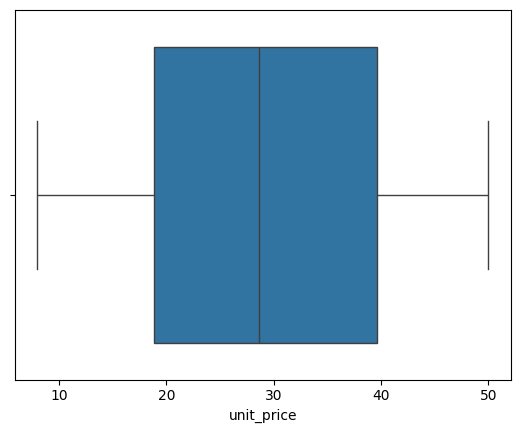

In [21]:
sns.boxplot(x=sales_data['unit_price'])

In [23]:
sales_data['unit_price'].isna().sum()

1

In [28]:
sales_data['unit_price'].fillna(sales_data['unit_price'].median(), inplace=True)
sales_data['unit_price'].isna().sum()


0

In [27]:
print(sales_data['unit_price'].dtype)

float64
